<a href="https://colab.research.google.com/github/chaeryeonggg/DM_2025/blob/main/graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#팀원과 팀원 친구

#그래프 데이터 정의
graph = {
    'chaeryeong': ['jeongwoo', 'seohyun'],
    'jeongwoo': ['haeun', 'jimin'],
    'seohyun': ['arin'],
    'haeun': [],
    'jimin': ['junho','minsu'],
    'junho': ['minsu'],
    'minsu': [],
    'arin': ['minsu']
}


#dfs
def dfs(graph, v, visited):
  visited.add(v)
  print(v, end=' ')
  for neighbor in graph[v]:
    if neighbor not in visited:
      dfs(graph, neighbor, visited)
print("DFS 탐색 순서:")
dfs(graph, 'chaeryeong', set())


#bfs
from collections import deque

def bfs(graph, start):
  visited=set()
  queue=deque([start])
  visited.add(start)

  while queue:
    v=queue.popleft()
    print(v, end=' ')
    for neighbor in graph[v]:
      if neighbor not in visited:
        visited.add(neighbor)
        queue.append(neighbor)
print("\nBFS 탐색 순서:")
bfs(graph, 'chaeryeong')

DFS 탐색 순서:
chaeryeong jeongwoo haeun jimin junho minsu seohyun arin 
BFS 탐색 순서:
chaeryeong jeongwoo seohyun haeun jimin arin junho minsu 

In [6]:
#감염경로

# 랜덤!! 코로나 감염, 경로 및 단계 추적
import random

"""100개 이상의 이름 반환"""
def get_korean_names():
    required_names = ['하은', '서현', '정우', '채령']    # 필수로 들어가는 이름

    initial_graph_names = ['지민', '준호', '민수', '아린']     # 초기 그래프에 포함된 이름

    # 추가 이름
    additional_names = [
        '민준', '서준', '도윤', '예준', '시우', '하준', '지호', '주원', '유준', '영수',
        '철수', '영희', '민지', '수빈', '유진', '지우', '윤서', '지유', '채원', '수아',
        '민서', '다은', '예은', '지민', '서연', '하윤', '소율', '예린', '지아', '유나',
        '은서', '다인', '가은', '승우', '도현', '건우', '현우', '우진', '선우', '연우',
        '유찬', '준서', '이준', '시윤', '재윤', '은우', '이안', '진우', '윤우', '승현',
        '준영', '태윤', '성민', '윤호', '동현', '준혁', '시현', '태민', '승민', '현준',
        '재원', '정훈', '성현', '지훈', '동하', '재민', '준우', '태현', '민재', '성준',
        '시후', '정현', '한결', '다인', '서아', '나은', '아윤', '소이', '시아', '나연',
        '채아', '하린', '다현', '윤아', '민솔', '로아', '보민', '서윤', '예나', '수현',
        '규리', '은지', '세아', '연아', '예원', '소은', '가윤', '다연', '혜원', '시은'
    ]

    # 모든 이름을 합치고 중복 제거!!!!!
    all_names_set = set(required_names + initial_graph_names + additional_names)

    # 100개가 안될 경우 대비 (이름 리스트가 충분히 길지만, 만약을 위함)
    while len(all_names_set) < 100:
        all_names_set.add(f"추가인원_{len(all_names_set) + 1}")

    # 100개만 선택
    final_names_list = list(all_names_set)[:100]
    return final_names_list


"""초기 그래프를 100개 노드 그래프로 확장"""
def create_full_graph(initial_graph, all_nodes):
    # 1. 모든 노드를 그래프에 추가
    full_graph = initial_graph.copy()
    existing_nodes = set(full_graph.keys())

    # 초기 그래프의 '값'에만 있던 노드들도 키로 추가
    all_initial_nodes = set(existing_nodes)
    for friends in initial_graph.values():
        all_initial_nodes.update(friends)

    for node in all_initial_nodes:
        if node not in full_graph:
            full_graph[node] = []

    # 2. 100개가 될 때까지 새 노드 추가
    for node in all_nodes:
        if node not in full_graph:
            full_graph[node] = []

    # 3. 그래프가 너무 듬성듬성하지 않도록 랜덤 엣지 추가
    # 각 노드가 평균 2~4명의 친구를 갖도록 설정
    node_list = list(full_graph.keys())

    for _ in range(150): # 150개의 랜덤 관계 추가(양방향)
        p1 = random.choice(node_list)
        p2 = random.choice(node_list)

        # 스스로에게, 그리고 이미 친구인 경우는 제외
        if p1 != p2 and p2 not in full_graph[p1]:
            # 양방향(친구) 관계
            full_graph[p1].append(p2)
            full_graph[p2].append(p1)

    return full_graph


"""'start_node'로부터 'probability' 확률로 'max_depth'까지 감염을 시뮬레이션"""
def simulate_infection(graph, start_node, probability, max_depth):
    infected_nodes = {start_node: 0} # 감염자: 감염 단계
    infection_path = {} # 감염 경로 (감염된 사람: 감염시킨 사람)

    # BFS를 위한 큐 (감염시킬 사람, 현재 단계)
    queue = [(start_node, 0)]

    while queue:
        current_person, current_level = queue.pop(0)

        # 최대 감염 단계(max_depth)에 도달하면 더 이상 전파하지 않음
        if current_level >= max_depth:
            continue

        # 현재 감염자의 친구(인접 리스트) 확인
        for friend in graph[current_person]:
            # 1. 아직 감염되지 않았고
            # 2. 랜덤 확률을 통과하면 감염
            if friend not in infected_nodes and random.random() < probability:
                next_level = current_level + 1
                infected_nodes[friend] = next_level # 감염자 목록에 추가
                infection_path[friend] = current_person # 감염 경로 기록
                queue.append((friend, next_level)) # 다음 전파를 위해 큐에 추가

    return infected_nodes, infection_path


"""감염 경로를 트리 형태로 재귀적으로 출력"""
def print_infection_tree(start_node, level, path_dict, infected_list):

    # 1. 현재 감염자 출력
    if level == 0:
        indent = ""
        level_text = "(첫 감염자)"
    else:
        indent = "  " * (level - 1) + " L "
        level_text = f"[{level}단계]"

    print(f"{indent}{start_node} {level_text}")

    # 2. 이 사람에게 감염된 사람들 찾기
    infected_by_this_person = []
    for infected, infector in path_dict.items():
        if infector == start_node:
            infected_by_this_person.append(infected)

    # 3. 감염된 사람들에 대해 재귀 호출
    for person in infected_by_this_person:
        # infected_list에 없는 경우는 (초기 감염자가 친구가 없는 경우 등) 방지
        if person in infected_list:
            print_infection_tree(person, infected_list[person], path_dict, infected_list)


"""감염자 목록을 단계별로 요약하여 출력"""
def print_infected_summary(infected_nodes, start_node):

    print("\n" + "="*40)
    print(f"      감염자 요약 (첫 감염자: {start_node})")
    print("="*40)

    if len(infected_nodes) <= 1:
        print("\n추가 감염자가 발생하지 않았습니다.")
        return

    # 단계별로 그룹화
    level_groups = {}
    for person, level in infected_nodes.items():
        if person == start_node:
            continue # 첫 감염자 제외

        if level not in level_groups:
            level_groups[level] = []
        level_groups[level].append(person)

    # 단계 순서대로 출력
    for level in sorted(level_groups.keys()):
        print(f"\n[ {level}단계 감염자 ] (총 {len(level_groups[level])}명)")
        print(" -> " + ", ".join(level_groups[level]))


# --- 실행 ---

# 1. 기본 설정
PATIENT_ZERO = '서현'
INFECTION_PROBABILITY = 0.35 # 35%의 확률로 감염 전파
MAX_INFECTION_DEPTH = 10     # 최대 10단계까지 전파( Max depth 10 )
TOTAL_NODES = 100

# 2. 그래프 생성
initial_graph = {
    '채령': ['정우', '서현'],
    '정우': ['하은', '지민'],
    '서현': ['아린', '채령'],
    '하은': ['정우'],
    '지민': ['준호', '민수', '정우'],
    '준호': ['민수', '지민'],
    '민수': ['지민', '준호', '아린'],
    '아린': ['민수', '서현']
}

all_node_names = get_korean_names()
full_graph = create_full_graph(initial_graph, all_node_names)

# 3. 감염 시뮬레이션
infected_list, infection_path = simulate_infection(
    full_graph,
    PATIENT_ZERO,
    INFECTION_PROBABILITY,
    MAX_INFECTION_DEPTH
)

# 4. 결과 출력 // 전체 관계도는 분량이 길기 때문에 주석처리해서 출력X
'''
print("="*40)
print(f"      전체 관계도 (총 {len(full_graph)}명)")
print("="*40)
print("{")
for i, (person, friends) in enumerate(full_graph.items()):
    print(f"  '{person}': {friends}" + ("," if i < len(full_graph) - 1 else ""))
print("}\n")
'''

print("\n" + "="*40)
print("      감염 경로 추적 (트리 구조)")
print("="*40)
if not infection_path and len(infected_list) == 1:
    print(f"\n{PATIENT_ZERO} (첫 감염자)")
    print("... 추가 감염이 발생하지 않았습니다.")
else:
    print_infection_tree(PATIENT_ZERO, 0, infection_path, infected_list)


print_infected_summary(infected_list, PATIENT_ZERO)


      감염 경로 추적 (트리 구조)
서현 (첫 감염자)
 L 아린 [1단계]
   L 은지 [2단계]
     L 유나 [3단계]
       L 나연 [4단계]
   L 다현 [2단계]
   L 채령 [2단계]
     L 서준 [3단계]
 L 민재 [1단계]

      감염자 요약 (첫 감염자: 서현)

[ 1단계 감염자 ] (총 2명)
 -> 아린, 민재

[ 2단계 감염자 ] (총 3명)
 -> 은지, 다현, 채령

[ 3단계 감염자 ] (총 2명)
 -> 유나, 서준

[ 4단계 감염자 ] (총 1명)
 -> 나연


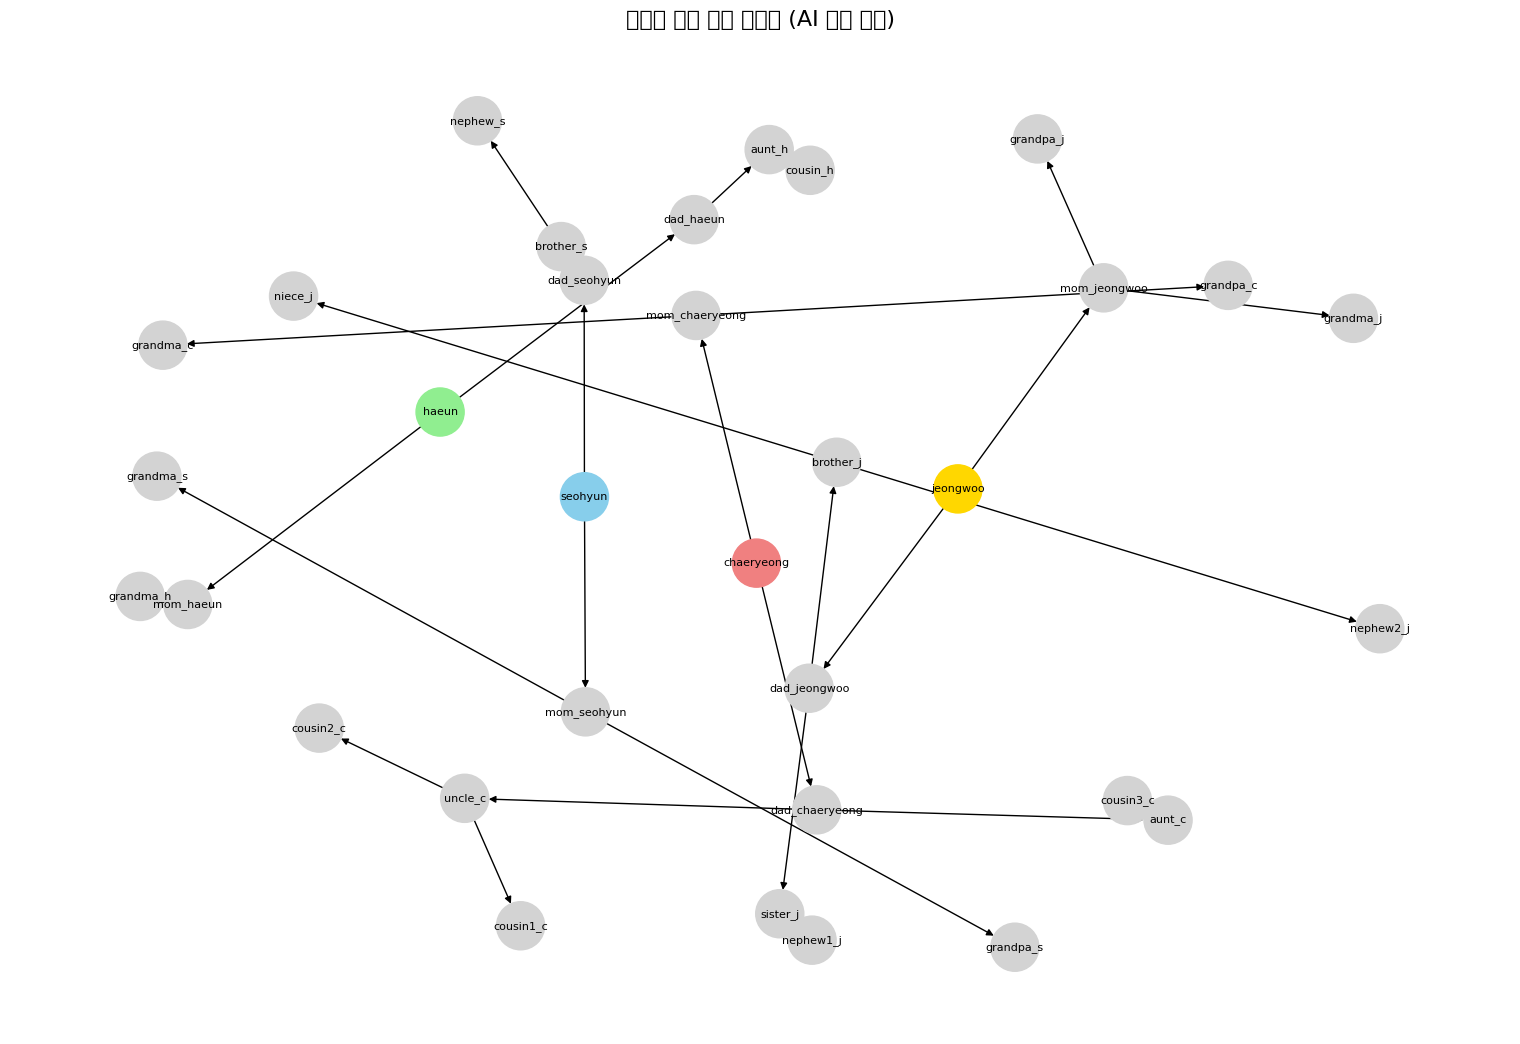

In [7]:
#팀원과 팀원가족

import networkx as nx
import matplotlib.pyplot as plt

# 1️⃣ 팀원 및 가족 그래프 데이터 정의
graph = {
    'chaeryeong': ['mom_chaeryeong', 'dad_chaeryeong'],
    'mom_chaeryeong': ['grandma_c', 'grandpa_c'],
    'dad_chaeryeong': ['uncle_c', 'aunt_c'],
    'grandma_c': [],
    'grandpa_c': [],
    'uncle_c': ['cousin1_c', 'cousin2_c'],
    'aunt_c': ['cousin3_c'],
    'cousin1_c': [], 'cousin2_c': [], 'cousin3_c': [],

    'seohyun': ['mom_seohyun', 'dad_seohyun'],
    'mom_seohyun': ['grandma_s', 'grandpa_s'],
    'dad_seohyun': ['brother_s'],
    'grandma_s': [], 'grandpa_s': [],
    'brother_s': ['nephew_s'], 'nephew_s': [],

    'haeun': ['mom_haeun', 'dad_haeun'],
    'mom_haeun': ['grandma_h'],
    'dad_haeun': ['aunt_h'],
    'grandma_h': [], 'aunt_h': ['cousin_h'], 'cousin_h': [],

    'jeongwoo': ['mom_jeongwoo', 'dad_jeongwoo'],
    'mom_jeongwoo': ['grandma_j', 'grandpa_j'],
    'dad_jeongwoo': ['sister_j', 'brother_j'],
    'grandma_j': [], 'grandpa_j': [],
    'sister_j': ['nephew1_j'],
    'brother_j': ['nephew2_j', 'niece_j'],
    'nephew1_j': [], 'nephew2_j': [], 'niece_j': []
}

# 2️⃣ 그래프 생성 및 간선 추가
G = nx.DiGraph()
for node, family in graph.items():
    for member in family:
        G.add_edge(node, member)

# 3️⃣ 팀원별 색상 지정
color_map = []
for node in G:
    if node.startswith('chaeryeong'): color_map.append('lightcoral')
    elif node.startswith('seohyun'): color_map.append('skyblue')
    elif node.startswith('haeun'): color_map.append('lightgreen')
    elif node.startswith('jeongwoo'): color_map.append('gold')
    else: color_map.append('lightgray')

# 4️⃣ 그래프 시각화
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=1200, font_size=8, arrows=True)
plt.title("팀원별 가족 관계 그래프 (AI 생성 코드)", fontsize=16)
plt.show()